In [1]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/MANU 465 Team 7/'

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image
from skimage.metrics import structural_similarity, mean_squared_error
import cv2 as cv
import os

[0.96952894 0.97327979 0.97328016 0.97328164 0.97328081 0.97327998
 0.97328145 0.97327961 0.97328035 0.97328127 0.9732809  0.97328053
 0.97328016 0.97328155 0.97327979 0.97328007 0.97328468 0.9732809
 0.97328025 0.97328155 0.97327942 0.97328035 0.97328099 0.97328062
 0.97328053 0.97327979 0.97328145 0.97327979 0.97328071 0.97328164
 0.97328108 0.97328007 0.97328136 0.97327942 0.97328016 0.97328071
 0.9732809  0.97328071 0.97327979 0.97328136 0.97327952 0.97328044
 0.97327426 0.97328053 0.97328016 0.97328145 0.97076274]
[[0.49001359 0.5206848  0.52169026 0.51687739 0.51574611 0.51769044
  0.51846623 0.51804149 0.51644536 0.51912746 0.52213784 0.52478125
  0.52270994 0.52149956 0.52301073 0.52543821 0.52221826 0.51780016
  0.51641805 0.51925671 0.51934869 0.51803571 0.5176252  0.52012769
  0.52167784 0.52294862 0.52198517 0.52048681 0.52267096 0.52170429
  0.52028994 0.5174896  0.51864431 0.51937733 0.51861368 0.5174786
  0.51834475 0.52059965 0.52253991 0.52225505 0.52036078 0.52184027


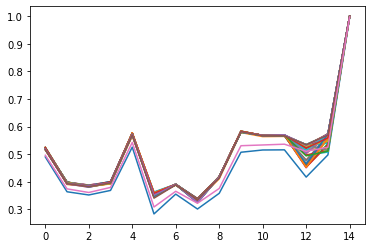

In [5]:
rootpath= "Imageset/"
#The list of subfolder, each contains images of a beam
Folderlist = ["RP_B01",
              "RP_B02",
              "RP_B03",
              "RP_B04",
              "RP_B05",
              "RP_B06",
              "RP_B07",
              "RP_B08",
              "RP_B09",
              "RP_B10",
              "RP_B11",
              "RP_B12",
              "RP_B13",
              "RP_B14",
              "RP_B15"]


Avgporosity=[]

#Loop through each beam
for Folder in Folderlist:
    path=rootpath+"/"+Folder
    files = [file for file in os.listdir(path) if file.endswith('png')]
   
    layercount=0
    porosity=[]
    for file in files:
        #open the image
        Image1 = Image.open(path+"/"+file)
        ImageArray = np.array(Image1)
        #Sum the avergae pixel value of this layer(this is the porosity of this layer)
        porosity.append(np.average(ImageArray))
        layercount=layercount+1
    #Store the average porosity
    Avgporosity.append(np.array(porosity)/255)
        
#WARNING: This is not exactly the porosity because there are dark edges around each image. Good news is that beam 15 is solid
#Therefore we can divide each beam with beam 15's value to get the actual porosity
print(Avgporosity[-1])
Beam15porosity=float(np.average(Avgporosity[-1]))

print(np.array(Avgporosity)/Beam15porosity)
plt.plot(np.array(Avgporosity)/Beam15porosity)

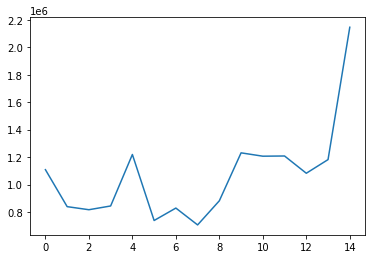

In [7]:
rootpath="Imageset/"
#The list of subfolder, each contains images of a beam
Folderlist = ["RP_B01",
              "RP_B02",
              "RP_B03",
              "RP_B04",
              "RP_B05",
              "RP_B06",
              "RP_B07",
              "RP_B08",
              "RP_B09",
              "RP_B10",
              "RP_B11",
              "RP_B12",
              "RP_B13",
              "RP_B14",
              "RP_B15"]


AvgInertia=[]

#Loop through each beam
for Folder in Folderlist:
    path=rootpath+"/"+Folder
    files = [file for file in os.listdir(path) if file.endswith('png')]
   
    layercount=0
    Inertia=0
    #Get the 50% point of this beam
    halflayers=(len(files)+1)/2
    
    for file in files:
        #open the image
        Image1 = Image.open(path+"/"+file)
        ImageArray = np.array(Image1)
        
        layercount=layercount+1
        #Sum inertia of this layer
        Inertia=Inertia+np.average(ImageArray)*abs(layercount-halflayers)*abs(layercount-halflayers)
        
        
        
        
    #Store the moment of inertia of the beam
    AvgInertia.append(Inertia)
        


plt.plot(np.array(AvgInertia))

In [27]:
# ANN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [29]:
# Scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = np.array(Avgporosity)
X = scaler_x.fit_transform(X)
y = np.array(AvgInertia).reshape(-1,1)
y = scaler_y.fit_transform(y)



In [31]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

[[0.30017817 0.35045942 0.3688513  0.34553635 0.28137369 0.32707112
  0.36252786 0.35601792 0.33468954 0.25465231 0.33913629 0.35746717
  0.35834122 0.31236857 0.2827304  0.34670157 0.36399596 0.34807638
  0.28600245 0.30472134 0.36114949 0.36075351 0.35091601 0.26817911
  0.35411364 0.35682925 0.36374608 0.32212045 0.27107648 0.34240244
  0.3654078  0.3507923  0.30909742 0.29368548 0.35558044 0.35688813
  0.35088388 0.26703374 0.32354392 0.35606325 0.36335293 0.33981532
  0.27270713 0.33866085 0.3663933  0.35232878 0.31469539]
 [0.         0.02540974 0.0382638  0.0190728  0.03473868 0.04095453
  0.02886694 0.0288056  0.02759051 0.00887667 0.0221839  0.02929543
  0.02924287 0.03424239 0.03494283 0.01272183 0.02036586 0.02935532
  0.033162   0.03711641 0.03175964 0.02040573 0.03592426 0.037697
  0.03606392 0.03561385 0.03313217 0.01285117 0.02775692 0.02925241
  0.03080207 0.03043203 0.03658023 0.01012372 0.02304894 0.02491434
  0.03227047 0.03839664 0.02929855 0.01817144 0.0274066  0.0

In [39]:
model = Sequential()
model.add(Input(shape=(47,)))
#model.add(Flatten())
model.add(Dense(47, activation='relu'))
model.add(Dense(47*2, activation='relu'))
model.add(Dense(47, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=20, batch_size=5)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 47)                2256      
_________________________________________________________________
dense_37 (Dense)             (None, 94)                4512      
_________________________________________________________________
dense_38 (Dense)             (None, 47)                4465      
_________________________________________________________________
dense_39 (Dense)             (None, 20)                960       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 11        
Total params: 12,414
Trainable params: 12,414
Non-trainable params: 0
_________________________________________________

In [33]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=1)
print("test loss, test acc:", results)

Evaluate on test data
3/3 [==============================] - 0s 3ms/step - loss: 5.1181e-05 - mean_squared_error: 5.1181e-05
test loss, test acc: [5.1181090384488925e-05, 5.1181090384488925e-05]


In [34]:
# Predict test data
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 105985645.76
Variance score: 0.96


In [ ]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()